In [1]:
import os
import numpy as np
import matplotlib
import torch
# !pip install mat73
# import mat73
import matplotlib.pyplot as plt
import csv
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split,TensorDataset
from torchvision import transforms, utils
import time
import pandas as pd
import scipy.io
import sklearn.metrics
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from torchvision.transforms import ToTensor

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
np.random.seed(1)

from scipy import signal

from sklearn.metrics import confusion_matrix

import seaborn as sn
import pandas as pd

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import LeaveOneGroupOut

from scipy.io import savemat




In [ ]:
Folder='personal_model_vit'
parent_dir = r"/content/drive/My Drive/Colab Notebooks/RFMG/data/"+Folder+'/'
path1 = os.path.join(parent_dir, 'cm_fig')
os.makedirs(path1, exist_ok = True) 
path1 = os.path.join(parent_dir, 'result_all')
os.makedirs(path1, exist_ok = True) 

def plotfigFullClass(cm,acc,tle,saveN):

    parent_dir = r"/content/drive/My Drive/Colab Notebooks/RFMG/data/"+Folder+'/'
    path1 = os.path.join(parent_dir, 'cm_fig')
    os.makedirs(path1, exist_ok = True) 
    path1 = os.path.join(parent_dir, 'result_all')
    os.makedirs(path1, exist_ok = True) 

    
    name1=["R", "G","Gx2","P1","P1x2","P2","P2x2","P23","P23x2","P4","P4x2","sG","sF","sP1","sP2","sP23","sP4","U","Ux2","D","Dx2","sU","sD"]
    name2=name1
    w=20 #fig size 1      change when label num change
    h=22   #fig size 2
    

    cm=cm*100
    df_cm = pd.DataFrame(cm, index=name1, columns=name2)
 
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
    plt.rcParams.update({'axes.facecolor':'whitesmoke'})
    mask = np.zeros_like(df_cm)
    mask[np.where(cm==0)] = True
    
    res=sn.heatmap(df_cm, cmap="YlGnBu",fmt=".1f",vmin=0, vmax=100,annot=True,mask=mask,square=True,cbar=False,annot_kws={"size": 18},xticklabels=name1,yticklabels=name1)
 
    sz=22
    res.set_xticklabels(res.get_xmajorticklabels(), fontsize = sz)
    res.set_yticklabels(res.get_ymajorticklabels(), fontsize = sz) 

    s01='Overall accuracy = {n:.1f} % '.format(n=acc*100)
    #plt.text(a,b,s01,fontsize=size)
    
    
    plt.title(tle+s01,fontsize = sz+2)

    figure = plt.gcf()
    figure.set_size_inches(w, h)
    
    plt.savefig(parent_dir+r"cm_fig/"+saveN+".png", dpi=600)




In [ ]:
cm_norm_max=np.array(cm_norm_max)
cm_norm_max_mean=np.mean(cm_norm_max,axis=0)
cm_norm_max_mean_th=np.where(cm_norm_max_mean > 0.007, cm_norm_max_mean, 0)
print(cm_norm_max_mean_th)
acc_max_mean=np.mean(acc_max)
plotfigFullClass(cm_norm_max_mean_th,acc_max_mean,'','fig_final_per8_personal_'+mVer)

In [2]:
# load saved tested results for all participants



from google.colab import drive
drive.mount('/content/drive')
in_ch=48
k=7
m1='Kfold'
m2='groupKfold'
m3='group'
ExpVer_list=['2_5','2_9','2_10','2_11','2_13','2_14','2_15','2_17'] # multi_participant dataset per8 
# ExpVer_list=['2_1','2_16','2_19']  sensor position vaiation
def loadResult(m):
  cm_norm_all_per=[]
  acc_all_per=[]
  test_y_all_per=[]
  feature_listName=["stft","stft2","cwt","cwt2","cwt3"]
  SaveName='ch'+str(in_ch)+'_'+str(k)+m
  for per in range(len(ExpVer_list)):
    Path=r"/content/drive/My Drive/Colab Notebooks/RFMG/data/"+ExpVer_list[per]+r"/result/npyFile/vit_"+SaveName+"_ensemble5.npz" # for VIT result 
    Path=r"/content/drive/My Drive/Colab Notebooks/RFMG/data/"+ExpVer_list[per]+r"/result/CNN/npyFile/CNN_"+SaveName+"_ensemble5.npz"
    Path=r"/content/drive/My Drive/Colab Notebooks/RFMG/data/"+ExpVer_list[per]+r"/result/CNN/npyFile/CNN_"+SaveName+"_1d.npz"  # for CNN result 
    data=np.load(Path,allow_pickle=True)
    cm_norm=data['cm_norm']
    cm_all=data['cm_all']
    #acc_all=data['acc_all']
    acc=data['acc']
    y=data['y']
    

    cm_norm_all_per.append(cm_norm)
 
    acc_all_per.append(acc)
    test_y_all_per.append(y)
    
  acc_all_per=np.array(acc_all_per)

  cm_norm_all_per=np.array(cm_norm_all_per)
  
   
  return cm_norm_all_per,acc_all_per,test_y_all_per


mVer=m2
cm_norm_all,acc_all,test_y_all=loadResult(mVer)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
SaveName='result_1d_cnn'+str(k)+mVer
acc_mean=np.mean(acc_all)
Folder='personal_model_CNN/'
savemat("/content/drive/My Drive/Colab Notebooks/RFMG/data/"+Folder+"result_all/"+SaveName+".mat",\
                    {'cm_norm_all':cm_norm_all,'acc_all':acc_all,\
                     'acc_mean':acc_mean })

np.savez_compressed("/content/drive/My Drive/Colab Notebooks/RFMG/data/"+Folder+"result_all/"+SaveName+".npz",\
                    cm_norm_all=cm_norm_all,acc_all=acc_all,acc_mean=acc_mean,\
  )

In [ ]:



## output ensemble result and output the final max accuracy, the highest or ensemble 

def ensemble_y(test_y_all):
  test_y1=test_y_all[0]
  y_ensemble=np.zeros([np.size(test_y1,axis=1),])
  for i in range(np.size(test_y1,axis=1)):
    
    list=[]
    for j in range(len(test_y_all)):

      list.append(test_y_all[j][1,i])  ## append different feat ver. 
    
    (unique, counts) = np.unique(list, return_counts=True)

    label=unique[np.argmax(counts)]
    y_ensemble[i]=label


  cm_norm=confusion_matrix(test_y1[0,:], y_ensemble,normalize='true')
  acc=accuracy_score(test_y1[0,:], y_ensemble)
  
   

  return cm_norm,acc,y_ensemble

cm_norm_en=[]
y_ensemble_en=[]
acc_en=[]
cm_norm_max=[]

acc_max=[]
max_Featver=[]  
for i in range(len(ExpVer_list)):
  test_y_per=test_y_all[i]

  cm_t,acc_t,y_ensemble_t=ensemble_y(test_y_per)
  cm_norm_en.append(cm_t)
  acc_en.append(acc_t)
  y_ensemble_en.append(y_ensemble_t)
  
  feature_listName=["stf2","stft2","cwt","cwt2","cwt3",'en']
  
  acc_comp=np.append(acc_all[i,:],acc_t)

  cm_comp=[cm_norm_all[i][0],cm_norm_all[i][1],cm_norm_all[i][2],cm_norm_all[i][3],cm_norm_all[i][4],cm_norm_en[i]]
  acc_max.append(acc_comp[np.argmax(acc_comp)])
  cm_norm_max.append(cm_comp[np.argmax(acc_comp)])
  max_Featver.append(feature_listName[np.argmax(acc_comp)])


cm_norm_max=np.array(cm_norm_max)
cm_norm_max_mean=np.mean(cm_norm_max,axis=0)
cm_norm_max_mean_th=np.where(cm_norm_max_mean > 0.007, cm_norm_max_mean, 0)
print(cm_norm_max_mean_th)
acc_max_mean=np.mean(acc_max)#Accuracy on all participants by transfer learning using 1/5 new data

Folder='personal_model_vit/'
#Folder='personal_model_CNN/'
SaveName='result_all_max_'+str(k)+mVer
#SaveName='result_all_max_'+str(k)+mVer+"sensorVar"
# savemat("/content/drive/My Drive/Colab Notebooks/RFMG/data/"+Folder+"result_all/"+SaveName+".mat",\
#                     {'cm_norm_all':cm_norm_all,'acc_all':acc_all,\
#                       'acc_max_mean':acc_max_mean,'cm_norm_max_mean_th':cm_norm_max_mean_th,\
#                    'acc_max':acc_max,'cm_norm_max':cm_norm_max,'max_Featver':max_Featver})

# np.savez_compressed("/content/drive/My Drive/Colab Notebooks/RFMG/data/"+Folder+"result_all/"+SaveName+".npz",\
#                     cm_norm_all=cm_norm_all,acc_all=acc_all,\
#                       acc_max_mean=acc_max_mean,cm_norm_max_mean_th=cm_norm_max_mean_th,\
#                    acc_max=acc_max,cm_norm_max=cm_norm_max,max_Featver=max_Featver)
    

[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.99264069 0.00735931 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.99330357 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.0087963  0.         0.         0.97662037 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.01881232 0.

In [ ]:
np.savez_compressed("/content/drive/My Drive/Colab Notebooks/RFMG/data/"+Folder+"result_all/"+SaveName+".npz",\
                    cm_norm_all=cm_norm_all,acc_all=acc_all,\
                      acc_max_mean=acc_max_mean,cm_norm_max_mean_th=cm_norm_max_mean_th,\
                   acc_max=acc_max,cm_norm_max=cm_norm_max,max_Featver=max_Featver)

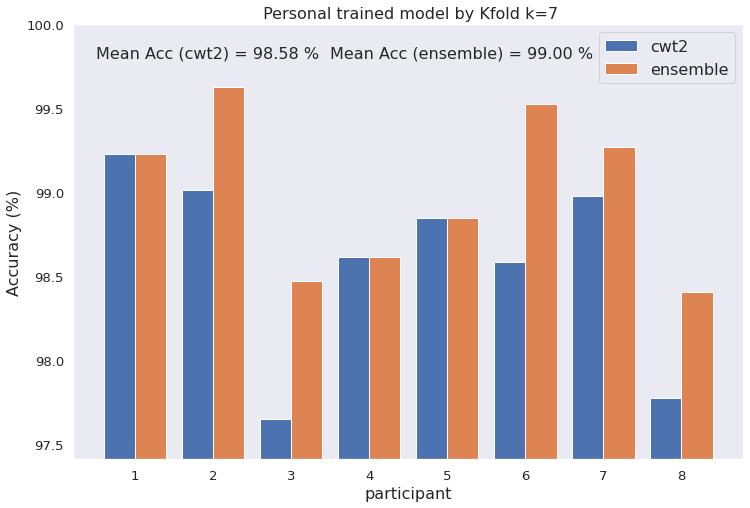

In [ ]:
# plop one featVer result one CV method 

k=7
FeatVer=3
feature_listName=["stft","stft2","cwt","cwt2","cwt3"]

acc1_all_per=acc_all[:,FeatVer]
acc0_all_per=np.array(acc_max)

saveFigPath=r"/content/drive/My Drive/Colab Notebooks/RFMG/data/"+Folder+'/'
path1 = os.path.join(saveFigPath, 'fig_all')
os.makedirs(path1, exist_ok = True) 

bar_width = 0.4
sz=16
fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(acc1_all_per))+1 -bar_width/2

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, acc1_all_per*100,width=bar_width,label=feature_listName[FeatVer])
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, acc0_all_per*100,width=bar_width,label='ensemble')
plt.legend(fontsize=sz)
plt.ylim(np.amin(acc0_all_per)*100-1, 100)
plt.grid(False)
axis_font={'fontname':'Times New Roman', 'size':str(sz)}

plt.xlabel('participant',axis_font)
plt.ylabel('Accuracy (%)',axis_font)

plt.title(" Personal trained model by "+mVer+ ' k='+ str(k),axis_font)
s01='Mean Acc'+' ('+feature_listName[FeatVer] +') '+'= {n:.2f} %'.format(n=np.mean(acc1_all_per)*100)
s02='Mean Acc (ensemble) = {n:.2f} %'.format(n=np.mean(acc0_all_per)*100)
plt.text(0.5,99.8,s01,axis_font)
plt.text(3.5,99.8,s02,axis_font)

tleSave=str(k)+mVer+'ensemble+'+feature_listName[FeatVer]+'all_per'

plt.savefig(saveFigPath+r"fig_all/"+tleSave+".png", dpi=300)

In [ ]:
# load saved tested results for personal model on all participants


Folder='model_all_vit/v1_per8_trans_result/'
from google.colab import drive
drive.mount('/content/drive')
in_ch=48
k=7
m1='Kfold'
m2='groupKfold'
m3='group'

def loadPersonal_Result(m,ExpVer):
  cm_all_per=[]
  acc_all_per=[]
  test_y_all_per=[]
  feature_listName=["stft","stft2","cwt","cwt2","cwt3"]
  
  SaveName='ch'+str(in_ch)+'_'+str(k)+m
  Path=r"/content/drive/My Drive/Colab Notebooks/RFMG/data/"+ExpVer+r"/result/npyFile/vit_"+SaveName+"_ensemble5.npz"
  # cm_norm=cm_norm,cm=cm,cm_all=cm_all,acc=acc,acc_all=acc_all,y=y,test_ind_all=test_ind_all,\
  #                 y_en=y_en,acc_en=acc_en,cm_en=cm_en,\
  #                 y_max=y_max,acc_max=acc_max,cm_max=cm_max,cm_norm_max=cm_norm_max,parameter_vit=parameter_vit,del_case=np.array(del_case)
  data=np.load(Path,allow_pickle=True)
  cm_norm=data['cm_norm']
  acc=data['acc']
  cm_norm_en=data['cm_norm_en']
  acc_en=data['acc_en']
  cm_norm_max=data['cm_norm_max']
  acc_max=data['acc_max']
  test_ind_all=data['test_ind_all']
  
   
  return cm_norm,acc,cm_norm_en,acc_en,cm_norm_max,acc_max,test_ind_all

cm_norm,acc,cm_norm_en,acc_en,cm_norm_max,acc_max,y=loadPersonal_Result(m2,'2_9')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: ignored